In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np

In [6]:
# !pip install --upgrade pip

# !pip install pandas
# !pip install requests
# !pip install datetime
# !pip install gql

     |████████████████████████████████| 2.1 MB 1.7 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


## Dataset \#1: Non Fungible Tokens Dataset 

- Size: 756.8 MB (zipped)
- Source: https://osf.io/vejrt/?view_only=319a53cf1bf542bbbe538aba37916537
- Comments: This takes a very long time to load (over 6mil rows!)

## Attribute Descriptions

- *Unique_id_collection*: Unique ID for a given NFT
- *Price_Crypto, Crypto, Price_USD*: Conversion in USD is done with a daily resolution
- *Seller_address, Seller_username, Buyer_address, Buyer_username*: Addresses for sellers and buyers and (when available) their username used on the NFT marketplace
- *Image_url_1, Image_url_2, Image_url_3, Image_url_4*: Url to the digital object associate with the NFT. Given that urls may change over time, first try to download Image_url_1, then Image_url_2, and so on..
- *Datetime_updated, Datetime_updated_seconds*: It identifies the time of the transaction with either a day or second resolution
- *Smart_contract*: Smart contract of the given NFT
- *ID_token*: ID of the NFT asset within a given smart contract
- *Transaction_hash*: hash of the transaction involving a NFT sale
- *Collection*: It corresponds to the collection in which the NFT belongs to
- *Collection_cleaned*: It removes common mispellings in the field Collection. It also uses words in Cleaning_collections.csv to smooth the names. For instance, Aavegotchi renames all collections starting with that string in Aavegotchi. Some unnamed collections are here called Miscellanea
- *Market*: It is where data are downloaded from (so the API).
- *Name*: Title of the NFT listing
- *Description*: Description of the NFT listings
- *Permanent_link*: A link that allows to verify the NFT authenticity (valid only for the OpenSea Market)
- *Category*: Category in which the NFT belongs to. Examples are: Art, Games, and Collectible

In [2]:
df = pd.read_csv('../../data/Data_API.csv.gz')

/Users/brennagiacchino/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,8.70947e+07,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,NaN,7.30446e+07,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,NaN,1.71075e+07,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,NaN,8.22309e+07,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,NaN,4.09254e+07,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games


## Initial EDA

Investigate column names/types, remove duplicate rows, remove rows where all columns are `NaN`.

In [8]:
df.columns # 24 columns total

Index(['Smart_contract', 'ID_token', 'Transaction_hash', 'Seller_address',
       'Seller_username', 'Buyer_address', 'Buyer_username', 'Image_url_1',
       'Image_url_2', 'Image_url_3', 'Image_url_4', 'Price_Crypto', 'Crypto',
       'Price_USD', 'Name', 'Description', 'Collection', 'Market',
       'Datetime_updated', 'Datetime_updated_seconds', 'Permanent_link',
       'Unique_id_collection', 'Collection_cleaned', 'Category'],
      dtype='object')

This dataset has over 6 million rows.

In [5]:
df.shape

(6071027, 24)

Check for any duplicate rows.

In [53]:
no_dups = df.drop_duplicates()
no_dups.shape

(6071027, 24)

## Transactions Over Time

First, we will look at number of transactions per day, over time. This will also confirm the time span of the dataset.

In [103]:
transactions_over_time = df.groupby(df.Datetime_updated)[['Crypto']].count().reset_index()

In [104]:
transactions_over_time.head()

,Datetime_updated,Crypto
0,2017-11-23 00:00:00,488
1,2017-11-24 00:00:00,433
2,2017-11-25 00:00:00,388
3,2017-11-26 00:00:00,143
4,2017-11-27 00:00:00,165


In [105]:
# Convert Datetime_updated from string to an actual date
transactions_over_time['Datetime_updated'] = pd.to_datetime(transactions_over_time['Datetime_updated'])

In [106]:
transactions_over_time.head()

,Datetime_updated,Crypto
0,2017-11-23,488
1,2017-11-24,433
2,2017-11-25,388
3,2017-11-26,143
4,2017-11-27,165


Text(0.5, 1.0, 'NFT Transaction Count between November 2017 and April 2021')

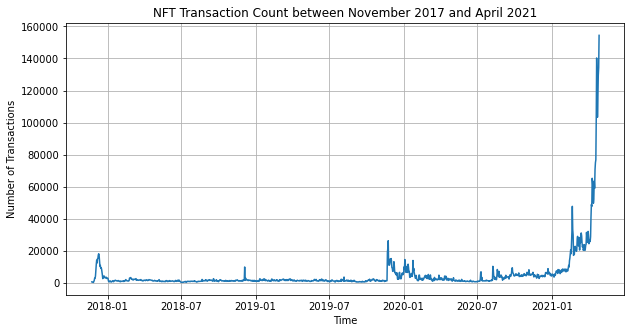

In [115]:
transactions_fig = plt.figure(figsize = (10, 5))
plt.plot(transactions_over_time["Datetime_updated"], transactions_over_time["Crypto"])
plt.grid()
plt.ylabel('Number of Transactions')
plt.xlabel('Time')
plt.title("NFT Transaction Count between November 2017 and April 2021")

## Top Crypto Currencies Used for Transactions

Let's see which currencies are used the most for these transactions.

In [154]:
# Group by cryptocurrency, and take the count. Sort the values and display.
by_Crypto = df.groupby(df.Crypto)[["Price_Crypto"]].count().reset_index()
by_Crypto = by_Crypto.rename(columns={'Price_Crypto': 'Count'})

In [155]:
by_Crypto.sort_values('Count', ascending=False)

,Crypto,Count
145,WAX,3185292
52,ETH,2405225
149,WETH,436355
87,MANA,29639
35,DAI,2141
...,...,...
98,NDR,1
31,CPT,1
93,MKR,1
25,CAMEL,1


In [156]:
# Taken from the top rows
top_crypto_names = ["WAX", "ETH", "WETH", "MANA"]

In [160]:
# For every cryptocurrency that isn't a top cryptocurrency, give the name 'Other'
by_Crypto['filtered_Crypto'] = np.where(by_Crypto['Crypto'].isin(top_crypto_names), by_Crypto['Crypto'], 'Other')
by_Crypto.sort_values('Count', ascending=False).head(10)

,Crypto,Count,filtered_Crypto
145,WAX,3185292,WAX
52,ETH,2405225,ETH
149,WETH,436355,WETH
87,MANA,29639,MANA
35,DAI,2141,Other
138,USDC,1491,Other
121,ROPE,746,Other
58,GALA,694,Other
126,SAND,583,Other
115,RARI,470,Other


In [170]:
# Group by the sum of the rows with the same filtered_Crypto
for_pie = by_Crypto.groupby(by_Crypto.filtered_Crypto).sum().sort_values('Count', ascending=False).reset_index()
for_pie

,filtered_Crypto,Count
0,WAX,3185292
1,ETH,2405225
2,WETH,436355
3,MANA,29639
4,Other,14516


In [171]:
crypto_counts = alt.Chart(for_pie).mark_arc().encode(
    theta=alt.Theta(field="Count", type="quantitative"),
    color=alt.Color(field="filtered_Crypto", type="nominal")
)
crypto_counts

alt.Chart(...)

In [172]:
source = pd.DataFrame(
    {"category": ["a", "b", "c", "d", "e", "f"], "value": [4, 6, 10, 3, 7, 8]}
)

base = alt.Chart(for_pie).encode(
    theta=alt.Theta("Count:Q", stack=True),
    color=alt.Color("filtered_Crypto:N", legend=None)
)

pie = base.mark_arc(outerRadius=120)
text = base.mark_text(radius=140, size=20).encode(text="filtered_Crypto:N")

pie + text

alt.LayerChart(...)

## Investigating Collections

First we look at collections with the most transactions.

In [193]:
by_collection = df.groupby(df.Collection_cleaned)[["Name"]].count().reset_index()
by_collection = by_collection.rename(columns={'Name': 'Count'})
by_collection = by_collection.sort_values('Count', ascending=False).head(20) # Saving the top 20
by_collection

,Collection_cleaned,Count
2025,Godsunchained,386707
1047,Cryptokittie,319624
3932,Sorare,290485
220,Axie,171272
3584,Rari,133052
4546,Xuniverse,48714
3035,Mycrypto,42674
2910,Mlbchampion,27345
2509,Knight,18743
1156,Cryptospace,18310


In [203]:
alt.Chart(by_collection, title="Collections with the Highest Transaction Counts").mark_bar(tooltip=True).encode(
    alt.X('Count:Q', axis=alt.Axis(title='Count')),
    alt.Y('Collection_cleaned:N', axis=alt.Axis(title='NFT Collection'), sort='-x')
)

alt.Chart(...)

Out of these collections, what is the mean value in U.S. Dollars that the NFT was sold for?

In [206]:
top_collections = list(by_collection.Collection_cleaned.unique())
print(top_collections)

['Godsunchained', 'Cryptokittie', 'Sorare', 'Axie', 'Rari', 'Xuniverse', 'Mycrypto', 'Mlbchampion', 'Knight', 'Cryptospace', 'Superrare', 'Decentraland', 'Art', 'Etheremon', 'Miscellanea', 'Hashmask', 'Cryptovoxel', 'Maker', 'Cryptopunk', 'Brave']


In [212]:
top_collections_df = df[df['Collection_cleaned'].isin(top_collections)]

In [215]:
top_collections_df.shape

(2598224, 24)

In [220]:
top_collections_mean = top_collections_df.groupby('Collection_cleaned')[['Price_Crypto', 'Price_USD']].mean().reset_index()

In [222]:
top_collections_mean.sort_values('Price_USD', ascending=False)

,Collection_cleaned,Price_Crypto,Price_USD
4,Cryptopunk,17.647645,31055.831358
10,Hashmask,49.960692,4324.221742
18,Superrare,2.165533,2138.846268
0,Art,8.650246,1324.447305
7,Decentraland,11339.242595,1104.797472
12,Maker,0.844108,1012.177459
6,Cryptovoxel,1.576863,753.066982
16,Rari,14.406940,617.566864
13,Miscellanea,26.941314,270.283014
17,Sorare,0.140110,167.178216


In [225]:
alt.Chart(top_collections_mean, title="Mean Transaction Price for Collections with High Transaction Counts").mark_bar(tooltip=True).encode(
    alt.X('Price_USD:Q', axis=alt.Axis(title='Price in U.S. Dollars')),
    alt.Y('Collection_cleaned:N', axis=alt.Axis(title='NFT Collection'), sort='-x'),
)

alt.Chart(...)

## Popular Categories